# นาย ธภัทร มีชัยธนา รหัส 6402539
# ข้อมูล Gun and Deaths in America dataset https://www.kaggle.com/datasets/maso0dahmed/gun-deaths-in-america-cdc/
# ข้อมูล BMI https://www.kaggle.com/datasets/yasserh/bmidataset

# สร้างตัวแปรแล้วทำการ Connect server service ของ MongoDB ที่ทำการ import มาจาก pymongo
# แล้วทำการสร้างตัวแปรที่ใส่ชื่อฐานข้อมูลแล้วเก็บไว้ในตัวแปร และ ใช้ตัวแปรที่เก็บชื่อฐานข้อมูลมากำหนดชื่อของ collection แล้วเก็บในอีกตัวแปรนึง

In [33]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')

mydb = client['6402539_Final']
mycol = mydb['Gun_Deaths_In_America']


# import pandas และ json เพื่อ ใช้ pd ในการอ่านไฟล์ dataset และ ใช้ json ทำการแปลงข้อมูลเป็น json แล้ว insert ข้อมูลที่ถูกแปลงเป็น json ลงไปในตัวแปรที่เก็บข้อมูลฐานข้อมูลเอาไว้

In [34]:
import pandas as pd
import json
df = pd.read_csv('Dataset/gun_deaths.csv')
d_json = json.loads(df.to_json(orient='records'))
# mycol.insert_many(d_json)

# สร้างตัวแปร แล้วเก็บ ค่าจากตัวแปร mycol แล้วใช่ medthod find หาข้อมูลจาก mycol ที่กำหนด database ไว้อยู่แล้ว มาเก็บไว้ใน ตัวแปร
# พร้อมกับสร้างตัวแปรมาเก็บข้อมูลที่ทำการหา มาแปลงเป็น Dataframe เพื่อเอามาวิเคราห์ พร้อมกับ 
# แล้ว drop column id เพื่อจะเอามา plot graph

In [35]:
from pymongo import MongoClient
filter={
    'age': {
        '$gte': 0
    }
}
project={
    '_id': 0, 
    'age': 1, 
}
sort=list({
    'age': 1
}.items())
result1 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data1 = pd.DataFrame(list(result1))
data1

,age
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
100775,101.0
100776,101.0
100777,102.0
100778,102.0


# ทำการ import seaborn เพื่อ plot graph แบบ histplot
# จาก graph จะโชว์การตายด้วยอาวุธปืนของแต่ละช่วงอายุในอเมริกา ตั้งแต่ปี 2012 - 2014

<Axes: xlabel='age', ylabel='Count'>

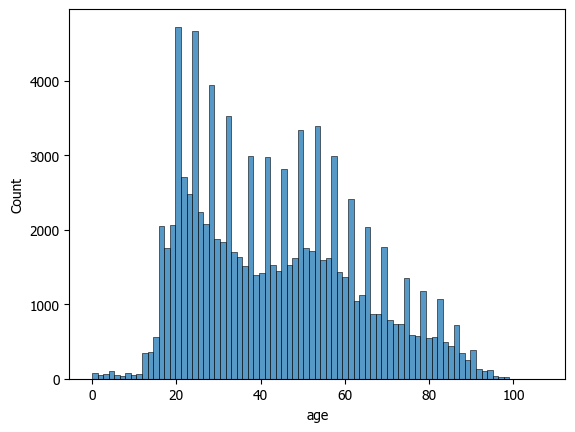

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
sns.histplot(x=data1['age'])

# ทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับ นำตัวแปรที่ทำการแปรงมาทำการ กำหนด column ที่เป็นของ เดือน
# มาทำการใช้ method counts เพื่อให้่ได้จำนวนผู้เสียชีวิตด้วยปืนของแต่ละเดือน เก็บลงตัวแปร count

In [37]:

filter={
    'year': {
        '$eq': 2012
    }
}
project={
    '_id': 0, 
    'year': 1, 
    'month': 1, 
    'age': 1
}
sort=list({
    'month': 1
}.items())

result2 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data2 = pd.DataFrame(list(result2))
count =  data2['month'].value_counts()
count

month
7     3026
5     2999
8     2954
9     2852
6     2826
4     2795
12    2791
1     2758
3     2743
10    2733
11    2729
2     2357
Name: count, dtype: int64

# ใช้ seaborn แล้วใช้ method barplot เพื่้อทำ graph รูปแบบ barplot พร้อมกับกดหนดแต่ละแกนด้วยตัวแปร count พร้อมกับให้แสดงค่าในแต่ละ column ในแต่ละกันด้วย .index กับ .values เท่านี้ก็จะได้จำนวนของการตายด้วยอาวุธปืนในแต่ละเดือนของปี 2012

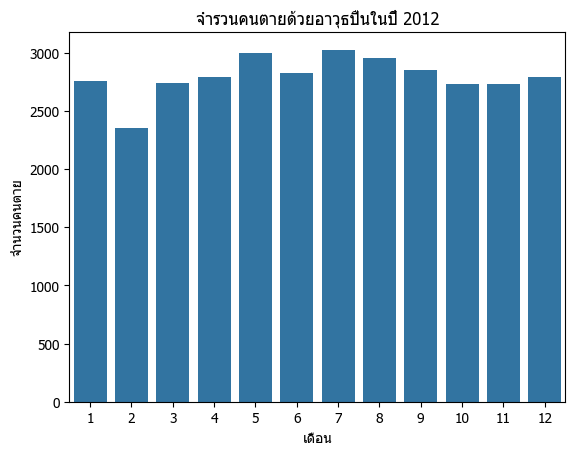

In [38]:
sns.barplot(x=count.index, y=count.values)
plt.title("จำรวนคนตายด้วยอาวุธปืนในปึ 2012")
plt.ylabel('จำนวนคนตาย')
plt.xlabel('เดือน')
plt.show()

# ทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับนำตัวแปรที่เก็บข้อมูลเป็น Dataframe มาใช้ groupby 
# เพื่อนำข้อมูลที่กระจายมาแบ่งกลุ่มข้อมูลปีและสถานที่เพื่อนับจำนวนการเสียชีวิตโดยแบ่งปลุ่มเป็นตามปีและสถานที่ แล้วนับจำนวนเกิดเหตุจาก month โดยใช้ count แล้วทำการ reset_index เพื่อให้จัดตารางให้ดูง่ายขึ้น

In [39]:
filter={
    'year': {
        '$gte': 2012, 
        '$lte': 2014
    }
}
project={
    '_id': 0, 
    'age': 1, 
    'month': 1, 
    'year': 1, 
    'place': 1
}
sort=list({
    'year': 1
}.items())
result3 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data3 = pd.DataFrame(list(result3))
death_count1 = data3.groupby(['year', 'place'])['month'].count().reset_index()
death_count1

,year,place,month
0,2012,Farm,142
1,2012,Home,19733
2,2012,Industrial/construction,83
3,2012,Other specified,4698
4,2012,Other unspecified,3072
5,2012,Residential institution,66
6,2012,School/instiution,242
7,2012,Sports,46
8,2012,Street,3878
9,2012,Trade/service area,1139


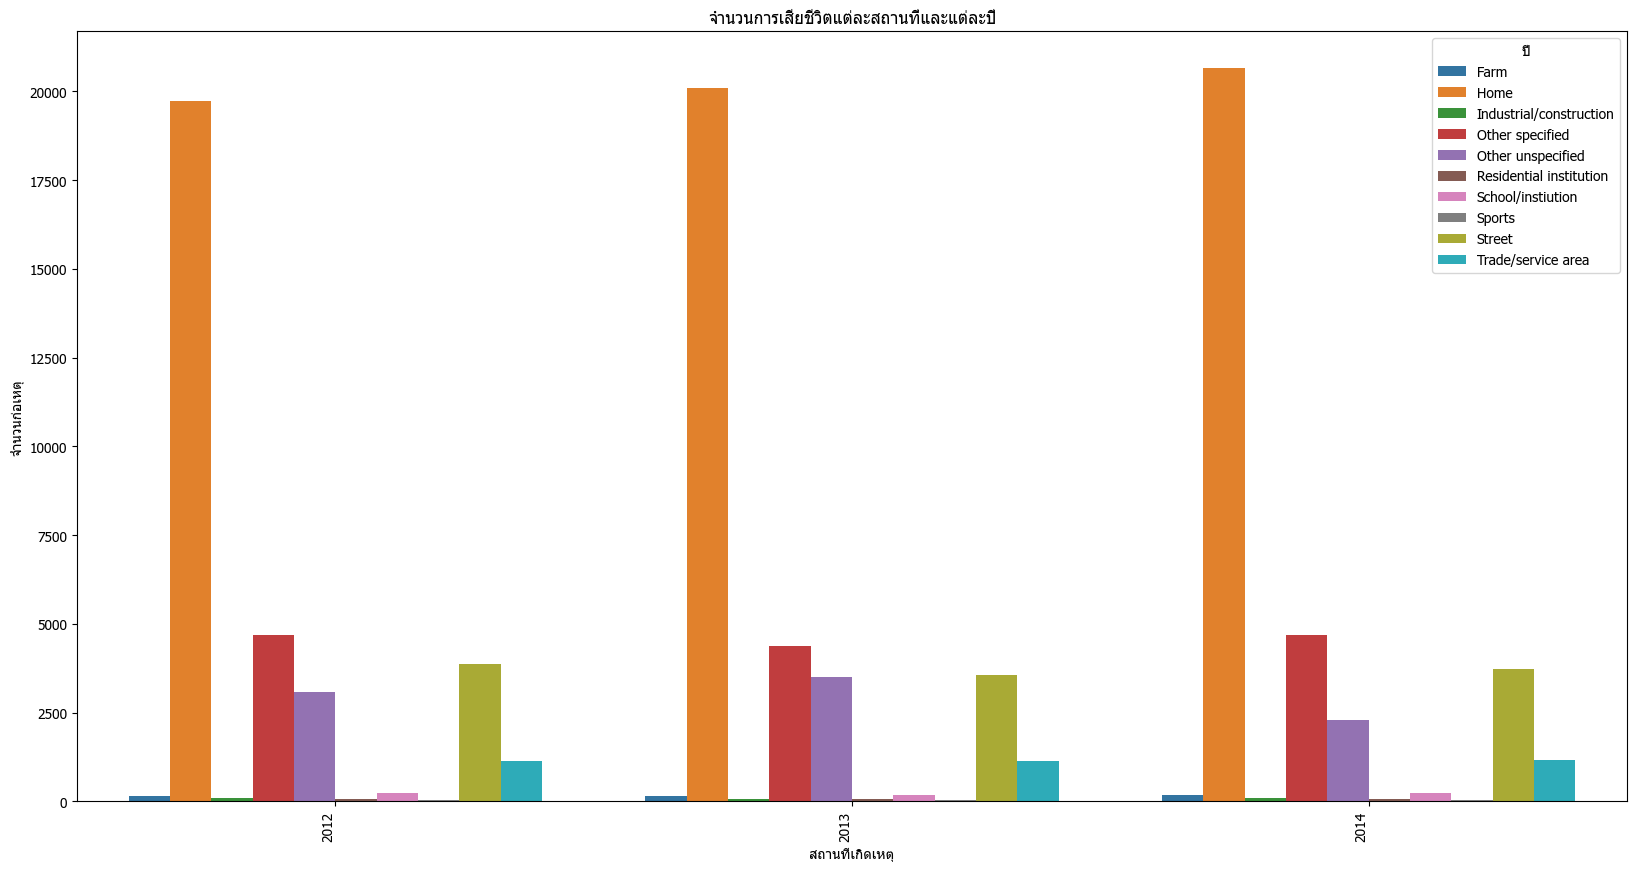

In [40]:
plt.figure(figsize=(20, 10))
sns.barplot(x=death_count1['year'],y =death_count1['month'], hue=death_count1['place'], dodge=True)
plt.title("จำนวนการเสียชีวิตแต่ละสถานที่และแต่ละปี")
plt.xlabel('สถานที่เกิดเหตุ')
plt.ylabel('จำนวนก่อเหตุ')
plt.xticks(rotation=90, ha='right')
plt.legend(title='ปี', bbox_to_anchor=(1, 1))
plt.show()


# ทำการสร้างตัวแปรที่เก็บตัวแปรที่ระบุ Database ไว้แล้วสร้างตัวแปรที่เก็บการอ่านไฟล์ของของ BMI  ที่มีข้อมูลอยู่ แล้วสร้างตัวแปรที่เก็บการแปลงค่าจาก df2 ที่เก็บเป็น DataFrame แปลงเป็น json แล้วนำ mycol2 ที่เก็บ ชื่อของ 
# Database และ collection ไว้มาทำกับ insert ตัวแปร d_json2 ที่ทำการแปลงข้อมูลเป็น json แล้ว นำข้อมูลเข้า Database ที่อยู่ใน 
# แล้วทำการดึงข้อมูลต่างๆเก็บในแต่ละตัวแปร แล้วแปรงเป็น dataFrame พร้อมกับนำตัวแปรที่เก็บข้อมูลเป็น Dataframe พร้อมกับเอาไป scatter plot เพื่อดู การกระจายของค่า BMI ของแต่ละส่วนสูง ยิ่งสูงมากก็ต้องการน้ำหนักมากขึ้น

In [108]:
mycol2 = mydb['BMI']
df2 = pd.read_csv('dataset/bmi.csv')
d_json2 = json.loads(df2.to_json(orient='records'))
# mycol2.insert_many(d_json2)

InsertManyResult([ObjectId('65632666fffccd9250a8f5a0'), ObjectId('65632666fffccd9250a8f5a1'), ObjectId('65632666fffccd9250a8f5a2'), ObjectId('65632666fffccd9250a8f5a3'), ObjectId('65632666fffccd9250a8f5a4'), ObjectId('65632666fffccd9250a8f5a5'), ObjectId('65632666fffccd9250a8f5a6'), ObjectId('65632666fffccd9250a8f5a7'), ObjectId('65632666fffccd9250a8f5a8'), ObjectId('65632666fffccd9250a8f5a9'), ObjectId('65632666fffccd9250a8f5aa'), ObjectId('65632666fffccd9250a8f5ab'), ObjectId('65632666fffccd9250a8f5ac'), ObjectId('65632666fffccd9250a8f5ad'), ObjectId('65632666fffccd9250a8f5ae'), ObjectId('65632666fffccd9250a8f5af'), ObjectId('65632666fffccd9250a8f5b0'), ObjectId('65632666fffccd9250a8f5b1'), ObjectId('65632666fffccd9250a8f5b2'), ObjectId('65632666fffccd9250a8f5b3'), ObjectId('65632666fffccd9250a8f5b4'), ObjectId('65632666fffccd9250a8f5b5'), ObjectId('65632666fffccd9250a8f5b6'), ObjectId('65632666fffccd9250a8f5b7'), ObjectId('65632666fffccd9250a8f5b8'), ObjectId('65632666fffccd9250a8f5

In [118]:
filter={}
project={
    '_id': 0,
    'Gender' : 0
}
sort=list({
    'Index': 1
}.items())

result4 = mycol2.find(
  filter=filter,
  projection=project,
  sort=sort
)
data4 = pd.DataFrame(list(result4))
data4

,Height,Weight,Index
0,191,54,0
1,193,54,0
2,181,51,0
3,198,50,0
4,190,50,0
...,...,...,...
495,152,98,5
496,150,153,5
497,141,136,5
498,150,95,5


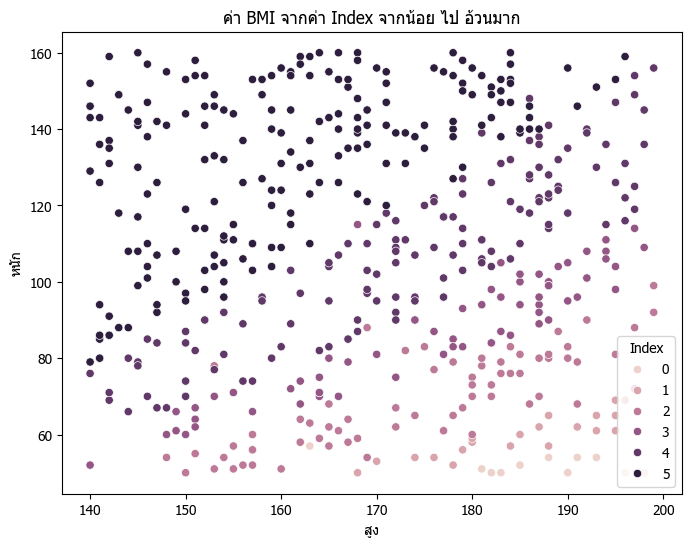

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'Height', y='Weight',hue = "Index",data = data4)
plt.title('ค่า BMI จากค่า Index จากน้อย ไป อ้วนมาก')
plt.xlabel('สูง')
plt.ylabel('หนัก')
plt.show()

# ทำการกำหนดข้อมูลต่างๆใน data ที่อยู่ใน MongoDB แล้วทำการหาข้อมูลที่ถูกกำหนดเก็บไว้ในข้อมูลที่เป็น object กับ array แล้วทำการเปลี่ยนข้อมูลนั้นจาก json เปลี่ยนมาเป๋็น DataFrame
# แล้วทำการเอาข้อมูลนั้นมาทำการ groupby เป็นการแบ่งประเภทข้อมูลของ column year กับ month แล้วทำการ counth จำนวน police ที่อยู่ในเหตุการ และทำการ reset_index เพื่อให้ข้อมูลนั้นดูง่าย

In [11]:
filter={
    'year': {
        '$gte': 2012, 
        '$lte': 2014
    },
    'police': {
        '$gte' : 1,
    }
}
project={
    '_id': 0, 
    'year': 1, 
    'month': 1,
    'police':1
}
sort=list({
    'year': 1
}.items())
result5 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data5 = pd.DataFrame(list(result5))
death_count3 = data5.groupby(['year', 'month'])['police'].count().reset_index()

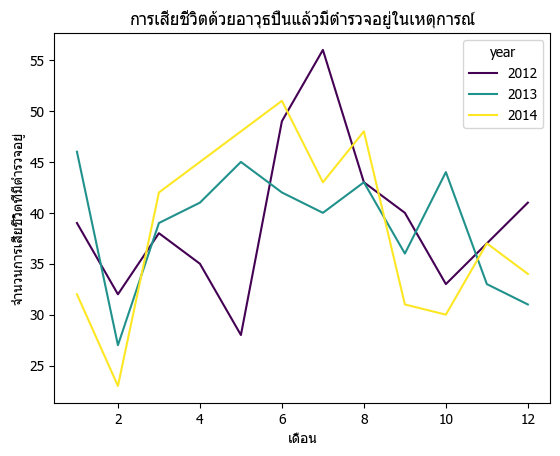

In [12]:
sns.lineplot(x='month', y='police', hue='year' , data=death_count3, palette='viridis')
plt.title('การเสียชีวิตด้วยอาวุธปืนแล้วมีตำรวจอยู่ในเหตุการณ์')
plt.xlabel('เดือน')
plt.ylabel('จำนวนการเสียชีวิตที่มีตำรวจอยู่')
plt.show()

# ทำการกำหนดข้อมูลต่างๆใน data ที่อยู่ใน MongoDB แล้วทำการหาข้อมูลที่ถูกกำหนดเก็บไว้ในข้อมูลที่เป็น object กับ array แล้วทำการเปลี่ยนข้อมูลนั้นจาก json เปลี่ยนมาเป๋็น DataFrame
# แล้วทำ plot graph รูปแบบ boxplot เพื่อดูการกระจายการตายด้วยอาวุธปืนของแต่ละช่วงอายุโดยดูจาก Q1 (ขอบล่างของขอบกล่อง) จะแสดง 25% ของการตายด้วยอาวุธปืนของอายุนั้นในแต่ละเดือน
# แล้ว Q2 (ขีดกลางที่อยู่ด้านในของกล่อง) จะแสดงค่ากลางของข้อมูลการตายด้วยอาวุธพื้นของช่วงอายุ
# แล้ว Q3 (ขอบบนของกล่อง) จะแสดงข้อมูล 75% ของการตายด้วยอาวุธปืนของช่วงอายุ
# แล้วจุดที่อยู่นอกกล่อง จะแสดงข้อมูลการจายที่เป็นการตายด้วยอาวุธปืนของช่วงอายุที่ไม่เยอะมาก

In [13]:
filter={
    'year': {
        '$eq': 2013
    }
}
project={
    '_id': 0, 
    'month': 1, 
    'age': 1, 
    'year': 1
}
sort=list({
    'age': 1
}.items())
result6 = mycol.find(
  filter=filter,
  projection=project,
  sort=sort
)
data6 = pd.DataFrame(list(result6))
data6

,year,month,age
0,2013,5,NaN
1,2013,5,NaN
2,2013,5,NaN
3,2013,5,NaN
4,2013,5,NaN
...,...,...,...
33631,2013,7,98.0
33632,2013,6,98.0
33633,2013,9,98.0
33634,2013,10,100.0


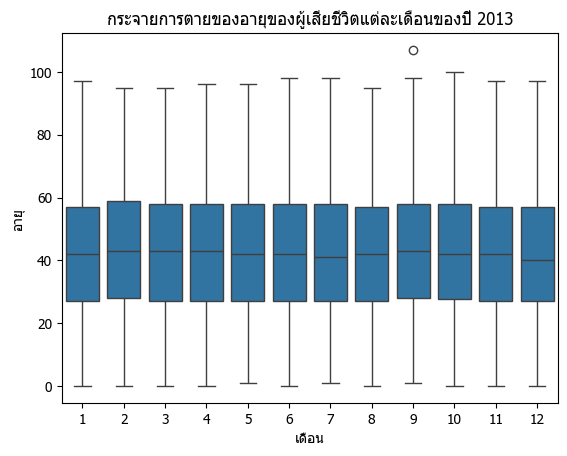

In [14]:
sns.boxplot(x='month', y='age', data=data6)
plt.title('กระจายการตายของอายุของผู้เสียชีวิตแต่ละเดือนของปี 2013')
plt.xlabel('เดือน')
plt.ylabel('อายุ')
plt.show()
